. (10 points) Create a list of 10 integers ranging from 1 to 20. Then, do the following:
o Extract and print the first 5 elements of the list.
o Extract and print the last 3 elements using negative indexing.
o Extract and print all elements from index 3 to index 7.


In [3]:
# Sqlite is a library that implements a SQL database engine. 
import sqlite3
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

 Write a Python program that:
o Creates a list of 5 different fruits.
o Add two more fruits to the list.
o Remove the last fruit in the list.
o Print the updated list.

In [10]:
#connection
conn = sqlite3.connect(r'C:\Users\d\Downloads\database.sqlite\database.sqlite')

In [11]:
#sqlite_master is a table with database schema
pd.read_sql(""" SELECT *
                FROM sqlite_master
                WHERE type='table';""",
           conn)

,type,name,tbl_name,rootpage,sql
0,table,Country,Country,2,"CREATE TABLE Country (\n CountryCode TEXT,\..."
1,table,CountryNotes,CountryNotes,186,CREATE TABLE CountryNotes (\n Countrycode T...
2,table,Series,Series,948,"CREATE TABLE Series (\n SeriesCode TEXT,\n ..."
3,table,Indicators,Indicators,4448,CREATE TABLE Indicators (\n CountryName TEX...
4,table,SeriesNotes,SeriesNotes,1317550,CREATE TABLE SeriesNotes (\n Seriescode TEX...
5,table,Footnotes,Footnotes,1317587,CREATE TABLE Footnotes (\n Countrycode TEXT...


1- Selecting

In [12]:
# check the head
pd.read_sql("""SELECT *
               FROM Indicators
               LIMIT 3;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,133.560907
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,87.797601
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579


In [13]:
# how many rows?
pd.read_sql("""SELECT COUNT(*)
               FROM Indicators;""",
           conn)

,COUNT(*)
0,5656458


In [14]:
# checking for missing values in one column
pd.read_sql("""SELECT COUNT(*)
               FROM Indicators
               WHERE IndicatorName IS NULL;""",
           conn)
           

,COUNT(*)
0,0


In [15]:
# if I need filter not null
pd.read_sql("""SELECT *
               FROM Indicators
               WHERE IndicatorName IS NOT NULL;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
...,...,...,...,...,...,...
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,3.600000e+01
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,9.000000e+01
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,2.420000e+02
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.300000e+00


In [16]:
# checking for missing values in all columns
pd.read_sql("""SELECT COUNT(*) - COUNT(CountryName) AS missing_CountryName,
                      COUNT(*) - COUNT(CountryCode) AS missing_CountryCode,
                      COUNT(*) - COUNT(IndicatorName) AS missing_IndicatorName,
                      COUNT(*) - COUNT(IndicatorCode) AS missing_IndicatorCode, 
                      COUNT(*) - COUNT(Year) AS missing_Year, 
                      COUNT(*) - COUNT(Value) AS missing_Value
                FROM Indicators;""",
           conn)

,missing_CountryName,missing_CountryCode,missing_IndicatorName,missing_IndicatorCode,missing_Year,missing_Value
0,0,0,0,0,0,0


In [17]:
# checking for missing values in all columns
pd.read_sql("""SELECT COUNT(*) - COUNT(CountryName) AS missing_CountryName,
                      COUNT(*) - COUNT(CountryCode) AS missing_CountryCode,
                      COUNT(*) - COUNT(IndicatorName) AS missing_IndicatorName,
                      COUNT(*) - COUNT(IndicatorCode) AS missing_IndicatorCode, 
                      COUNT(*) - COUNT(Year) AS missing_Year, 
                      COUNT(*) - COUNT(Value) AS missing_Value
                FROM Indicators;""",
           conn)

,missing_CountryName,missing_CountryCode,missing_IndicatorName,missing_IndicatorCode,missing_Year,missing_Value
0,0,0,0,0,0,0


In [18]:
# selecting distinct indicators
pd.read_sql("""SELECT DISTINCT IndicatorName
                FROM Indicators;""",
           conn)

,IndicatorName
0,"2005 PPP conversion factor, GDP (LCU per inter..."
1,"2005 PPP conversion factor, private consumptio..."
2,ARI treatment (% of children under 5 taken to ...
3,Access to electricity (% of population)
4,"Access to electricity, rural (% of rural popul..."
...,...
1339,Women's share of population ages 15+ living wi...
1340,"Youth literacy rate, population 15-24 years, b..."
1341,"Youth literacy rate, population 15-24 years, f..."
1342,"Youth literacy rate, population 15-24 years, g..."


2- Filtering

In [19]:
# I wanna search for some indicator about GDP
pd.read_sql("""SELECT DISTINCT IndicatorName
               FROM Indicators
               WHERE IndicatorName LIKE 'GDP%';""",
           conn)

,IndicatorName
0,GDP (constant LCU)
1,GDP (current LCU)
2,GDP at market prices (constant 2005 US$)
3,GDP at market prices (current US$)
4,GDP deflator (base year varies by country)
5,GDP growth (annual %)
6,GDP per capita (constant 2005 US$)
7,GDP per capita (constant LCU)
8,GDP per capita (current LCU)
9,GDP per capita (current US$)


In [20]:
# how about GDP per capita of Brazil in last years ?
pd.read_sql(""" SELECT *
                FROM Indicators
                WHERE IndicatorName ='GDP per capita (current US$)'
                AND CountryName = "Brazil"
                AND Year>=2010;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2010,11124.245780
1,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,13042.421933
2,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,11922.513058
3,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,11711.004405
4,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,11384.415010


In [21]:
# let's  compare with China
pd.read_sql("""SELECT *
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND (CountryName= 'Brazil' OR CountryName= 'China')
               AND Year>=2010;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2010,11124.245780
1,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2010,4514.940520
2,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,13042.421933
3,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,5574.187093
4,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,11922.513058
5,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,6264.643878
6,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,11711.004405
7,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,6991.853866
8,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,11384.415010
9,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,7590.016441


In [22]:
# let's check the 90's in Brazil
pd.read_sql("""SELECT * 
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND CountryName='Brazil'
               AND Year BETWEEN 1990 AND 1999;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1990,3071.627953
1,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1991,3942.403941
2,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1992,2578.207009
3,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1993,2774.174127
4,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1994,3482.529816
5,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1995,4827.152443
6,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1996,5163.265813
7,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1997,5279.111298
8,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1998,5083.700964
9,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,1999,3476.144038


In [23]:
# let's check other countries in 2014
pd.read_sql("""SELECT *
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND CountryName IN ("Brazil", "China", "India")
               AND Year=2014;""",
            conn)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,11384.415010
1,China,CHN,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,7590.016441
2,India,IND,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,1581.510703


3- Aggregating and Summarizing

In [24]:
# let's search for the highest GDP per capita in 2014
pd.read_sql("""SELECT CountryName, MAX (Value)
               FROM Indicators
               WHERE IndicatorName = 'GDP per capita (current US$)'
               AND Year = 2014;""",
            conn)

,CountryName,MAX (Value)
0,Luxembourg,116664.262488


In [25]:
#Let's order (and reafirm the highest GDP per capita)
pd.read_sql("""SELECT * 
               FROM Indicators
               WHERE IndicatorName='GDP per capita (current US$)'
               AND Year= 2014
               ORDER BY Value DESC
               LIMIT 3;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,116664.262488
1,Norway,NOR,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,97307.421592
2,Qatar,QAT,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,96732.402545


In [26]:
# Let's compare the averages
pd.read_sql(""" SELECT CountryName, AVG(Value)
                FROM Indicators
                WHERE IndicatorName= 'GDP per capita (current US$)'
                AND CountryName IN ('Brazil', 'China', 'India', 'Angola')
                AND Year>2010
                GROUP BY CountryName;""",
           conn)

,CountryName,AVG(Value)
0,Angola,5495.348173
1,Brazil,12015.088601
2,China,6605.175319
3,India,1489.484052


In [27]:
#how many measures during this time?
pd.read_sql(""" SELECT CountryName, count (*) AS n_measures
                FROM Indicators
                WHERE IndicatorName= 'GDP per capita (current US$)'
                AND CountryName IN ('Brazil', 'China', 'India', 'Angola')
                AND Year>2010
                GROUP BY CountryName
                ORDER BY n_measures
                LIMIT 10;""",
           conn)

,CountryName,n_measures
0,Angola,3
1,Brazil,4
2,China,4
3,India,4


In [28]:
# important to know that Angola has less measures during this time
pd.read_sql(""" SELECT *
                FROM Indicators
                WHERE IndicatorName= 'GDP per capita (current US$)'
                AND CountryName = 'Angola'
                AND Year>2010;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,2011,5053.738649
1,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,5531.776299
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,5900.529570


4- JOINs


In [29]:
# let's make a join to get the information about indicators GDP related measured in 2014 in Brazil
pd.read_sql(""" SELECT Indicators.*, Series.LongDefinition
                FROM Indicators
                LEFT JOIN Series 
                ON Indicators.IndicatorName  = Series.IndicatorName
                WHERE Indicators.IndicatorName LIKE 'GDP%'
                AND CountryName ='Brazil'
                AND Year=2014;""",
            conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,LongDefinition
0,Brazil,BRA,GDP (constant LCU),NY.GDP.MKTP.KN,2014,1.872042e+12,GDP is the sum of gross value added by all res...
1,Brazil,BRA,GDP (current LCU),NY.GDP.MKTP.CN,2014,5.521256e+12,GDP at purchaser's prices is the sum of gross ...
2,Brazil,BRA,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,2014,1.206071e+12,None
3,Brazil,BRA,GDP at market prices (current US$),NY.GDP.MKTP.CD,2014,2.346076e+12,None
4,Brazil,BRA,GDP deflator (base year varies by country),NY.GDP.DEFL.ZS,2014,2.949323e+02,The GDP implicit deflator is the ratio of GDP ...
5,Brazil,BRA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,1.447074e-01,Annual percentage growth rate of GDP at market...
6,Brazil,BRA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,2014,5.852500e+03,GDP per capita is gross domestic product divid...
7,Brazil,BRA,GDP per capita (constant LCU),NY.GDP.PCAP.KN,2014,9.084146e+03,GDP per capita is gross domestic product divid...
8,Brazil,BRA,GDP per capita (current LCU),NY.GDP.PCAP.CN,2014,2.679208e+04,GDP per capita is gross domestic product divid...
9,Brazil,BRA,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,1.138442e+04,GDP per capita is gross domestic product divid...


5- Using CASE WHEN¶


In [30]:
# I'm using arbitrary values, this is an exercise with didactic purposes: cuts on 10000 and 80000
df=pd.read_sql(""" SELECT *,
                   CASE WHEN Value < 10000 THEN 'Low'
                   WHEN Value > 80000 THEN 'High'
                   ELSE 'Medium' END AS Category
                   FROM Indicators
                   WHERE IndicatorName='GDP per capita (current US$)'
                   AND Year=2014;""",
              conn)

C:\Users\d\AppData\Local\Temp\ipykernel_49940\3499132436.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1= sns.distplot(df.Value, bins=40, hist_kws={'edgecolor':'k'}, color='mediumseagreen',kde=False,ax=axes[0])
C:\Users\d\AppData\Local\Temp\ipykernel_49940\3499132436.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2= sns.countplot(x='Category', data=df, palette="Greens", ax=axes[1])


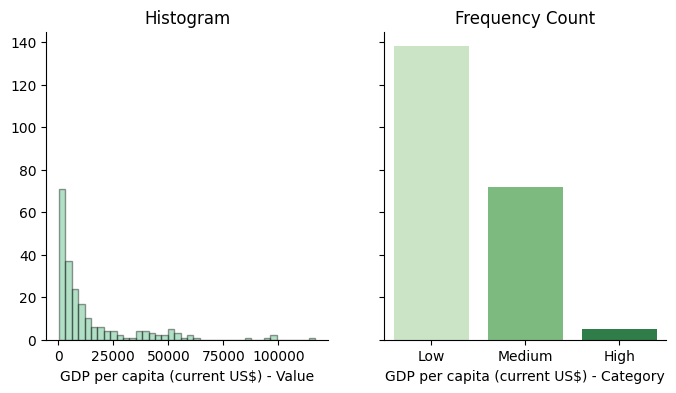

In [31]:
fig, axes= plt.subplots(1,2, figsize=(8,4),sharey=True)

ax1= sns.distplot(df.Value, bins=40, hist_kws={'edgecolor':'k'}, color='mediumseagreen',kde=False,ax=axes[0])
ax1.set_title('Histogram')
ax1.set(xlabel="GDP per capita (current US$) - Value")
ax1= sns.despine()

ax2= sns.countplot(x='Category', data=df, palette="Greens", ax=axes[1])
ax2.set_title('Frequency Count')
ax2.set(xlabel="GDP per capita (current US$) - Category")
ax2= sns.despine();

In [32]:
fig.savefig('eda_sql.png', transparent=True)

6 - Window Function

In [33]:
# adding the mean of last 3 years using window function

pd.read_sql(""" SELECT *,
                ROUND(AVG(Value) OVER (PARTITION BY CountryCode),0) AS AVG_3Y
                FROM Indicators
                WHERE IndicatorName='GDP per capita (current US$)'
                AND Year IN (2012,2013,2014);""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,AVG_3Y
0,Andorra,ADO,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,39666.369215,41236.0
1,Andorra,ADO,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,42806.522553,41236.0
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,690.842629,664.0
3,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,666.795051,664.0
4,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,633.569247,664.0
...,...,...,...,...,...,...,...
659,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,1759.192902,1722.0
660,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,1721.623274,1722.0
661,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,850.827694,896.0
662,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,905.500322,896.0


7 - Common Table Expression (CTE)

In [34]:
# the first place from each year
pd.read_sql(""" WITH GDP_3 AS 
                (SELECT *,
                RANK () OVER (PARTITION BY Year ORDER BY Value DESC) AS myrank
                FROM Indicators
                WHERE IndicatorName='GDP per capita (current US$)'
                AND Year IN (2012,2013,2014))
                
                SELECT *
                FROM GDP_3
                WHERE myrank = 1;""",
           conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,myrank
0,Liechtenstein,LIE,GDP per capita (current US$),NY.GDP.PCAP.CD,2012,149160.758132,1
1,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,2013,113726.638979,1
2,Luxembourg,LUX,GDP per capita (current US$),NY.GDP.PCAP.CD,2014,116664.262488,1
